# Chapter 10: Big Entropy and the Generalized Linear Model

Statistical Rethinking, 2nd Edition

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

#### Code 10.1

In [3]:
d = {
    "A": [0, 0, 10, 0, 0],
    "B": [0, 1, 8, 1, 0],
    "C": [0, 2, 6, 2, 0],
    "D": [1, 2, 4, 2, 1],
    "E": [2, 2, 2, 2, 2],
}
p = pd.DataFrame(data=d)

#### Code 10.2

In [4]:
p_norm = p / p.sum(0)

#### Code 10.3

In [5]:
def entropy(x):
    y = [0 if i == 0 else i * np.log(i) for i in x]
    return -sum(y)


H = p_norm.apply(entropy, axis=0)
H

A   -0.000000
B    0.639032
C    0.950271
D    1.470808
E    1.609438
dtype: float64

#### Code 10.4

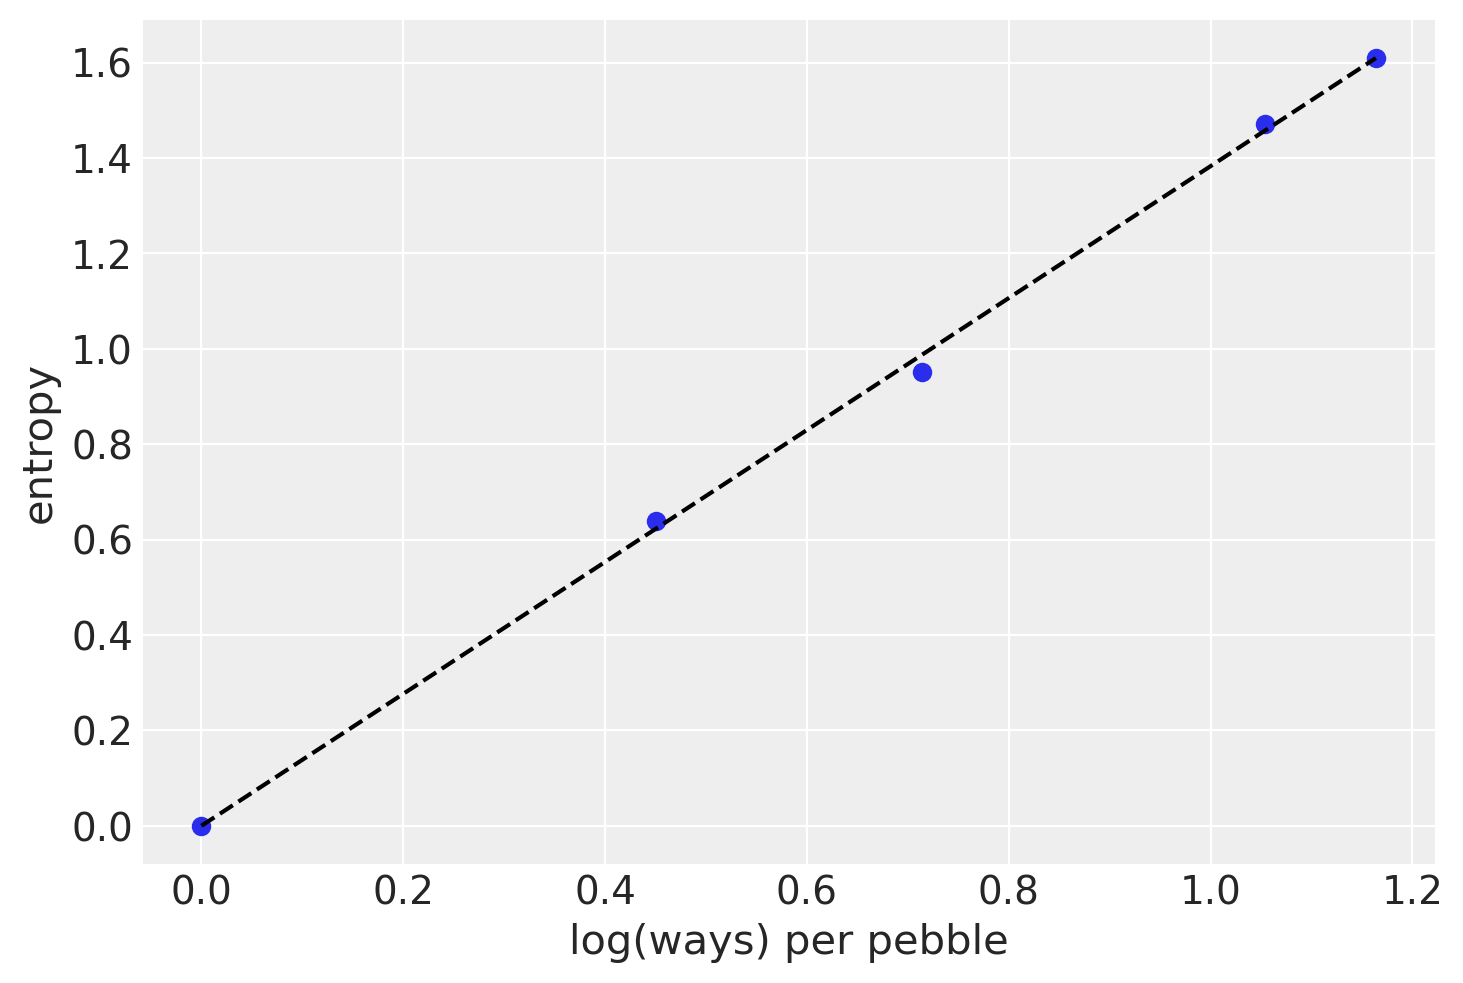

In [6]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = np.log(ways) / 10
plt.plot(logwayspp, H, "o")
plt.plot([0.0, max(logwayspp)], [0.0, max(H)], "--k")
plt.ylabel("entropy")
plt.xlabel("log(ways) per pebble");

#### Code 10.5

In [7]:
# Build list of the candidate distributions.
p = [
    [1 / 4, 1 / 4, 1 / 4, 1 / 4],
    [2 / 6, 1 / 6, 1 / 6, 2 / 6],
    [1 / 6, 2 / 6, 2 / 6, 1 / 6],
    [1 / 8, 4 / 8, 2 / 8, 1 / 8],
]

# Compute expected value of each. The sum of the multiplied entries is just a dot product.
p_ev = [np.dot(i, [0, 1, 1, 2]) for i in p]
p_ev

[1.0, 0.9999999999999999, 1.0, 1.0]

#### Code 10.6

In [8]:
# Compute the entropy of each distribution
p_ent = [entropy(i) for i in p]
p_ent

[1.3862943611198906,
 1.3296613488547582,
 1.3296613488547582,
 1.2130075659799042]

#### Code 10.7

In [9]:
p = 0.7
A = [(1 - p) ** 2, p * (1 - p), (1 - p) * p, p**2]
A

[0.09000000000000002,
 0.21000000000000002,
 0.21000000000000002,
 0.48999999999999994]

#### Code 10.8

In [10]:
-np.sum(A * np.log(A))

1.221728604109787

#### Code 10.9

In [11]:
def sim_p(G=1.4):
    x123 = np.random.uniform(size=3)
    x4 = (G * np.sum(x123) - x123[1] - x123[2]) / (2 - G)
    x1234 = np.concatenate((x123, [x4]))
    z = np.sum(x1234)
    p = x1234 / z
    return -np.sum(p * np.log(p)), p

#### Code 10.10

In [12]:
H = np.zeros(10**5)
p = np.zeros((10**5, 4))
for rep in range(10**5):
    h, p_ = sim_p()
    H[rep] = h
    p[rep] = p_

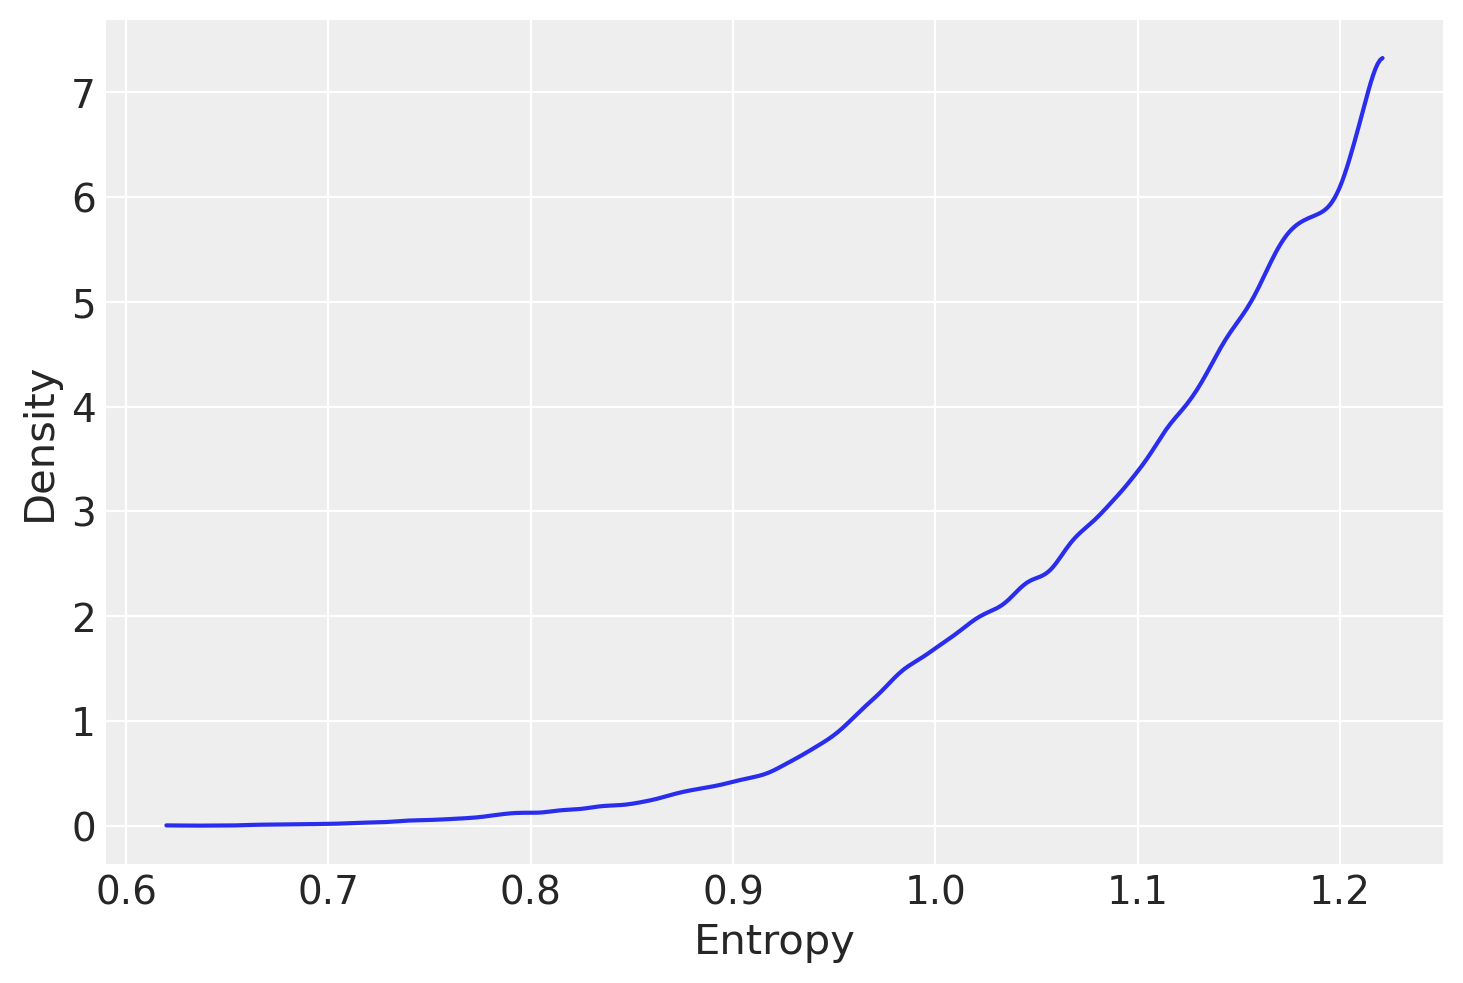

In [13]:
az.plot_kde(H)
plt.xlabel("Entropy")
plt.ylabel("Density");

#### Code 10.12

In [14]:
np.max(H)

1.2217273565508622

#### Code 10.13

In [15]:
p[np.argmax(H)]

array([0.08967833, 0.21044636, 0.21019698, 0.48967833])

In [16]:
%load_ext watermark
%watermark -v -iv -w

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

numpy     : 1.26.3
pandas    : 2.1.4
arviz     : 0.17.0
matplotlib: 3.8.2

Watermark: 2.4.3

